In [1]:
import glob
from matplotlib import pyplot as plt
import cv2
import numpy as np

images = glob.glob("../../data/*.jpg")
images

['../../data/electric_meter.jpg', '../../data/gas_meter.jpg']

## Load and show images

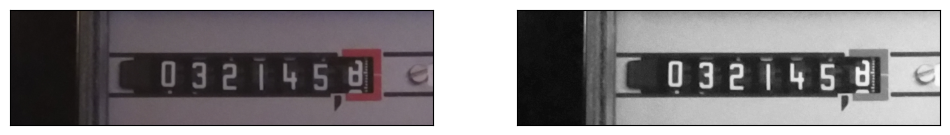

In [2]:
fname = images[0]

img = cv2.imread(fname)

# crop region of interest
roi = [(1200, 1000), (2300, 1300)]
img = img[roi[0][1]:roi[1][1], roi[0][0]:roi[1][0], :]

# convert to gray image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# show cropped images
fig, ax = plt.subplots(1, 2, figsize=(12, 9))
ax[0].imshow(img[:,:,::-1])
ax[1].imshow(gray, cmap="Greys_r")
for _ax in ax:
    _ax.set_xticks([])
    _ax.set_yticks([])
fig.show()

## Trace numbers

Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete([[383, 119], [853, 119], [853, 227], [383, 227]], '032145', 0.9976521713298825)


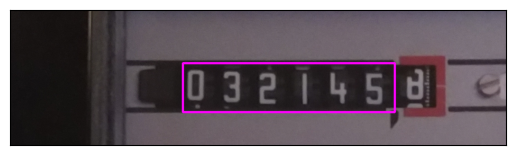

In [3]:
# https://stackoverflow.com/a/74798210
import easyocr

# init reader
reader = easyocr.Reader(['en'], gpu=False)
# trace only numbers
result = reader.readtext(gray, allowlist ='0123456789')
result = result[0]
print(result)

# show box used by easyocr
box_coords = result[0]
cv2.polylines(img, [np.array(box_coords, np.int32)], True, [255, 0, 255], 3)

plt.figure()
plt.imshow(img[:, :, ::-1])
plt.xticks([]); plt.yticks([])
plt.show()